# This is how you do a plot

In [1]:
import matplotlib
import matplotlib.pyplot as plt

# prerequistites
# (1) install the fonts as TrueTypeFonts
# (2) delete the matplotlib font-cache (NOTE: matplotlib installation in your environment!!)
# (3) restart the session
# (4) check if font has been found using cmd below
# matplotlib.font_manager.findfont(matplotlib.font_manager.FontProperties(family=['serif']))
# output should be something like 
# 'C:\\Users\\{USERNAME}\\AppData\\Local\\Microsoft\\Windows\\Fonts\\lmroman12-regular.ttf'

# set font for captions
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Latin Modern Roman'
matplotlib.rcParams['figure.dpi'] = 240

# set font for LaTeX
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Latin Modern Roman'
matplotlib.rcParams['mathtext.it'] = 'Latin Modern Roman:italic'
matplotlib.rcParams['mathtext.bf'] = 'Latin Modern Roman:bold'

This plot can be altered!

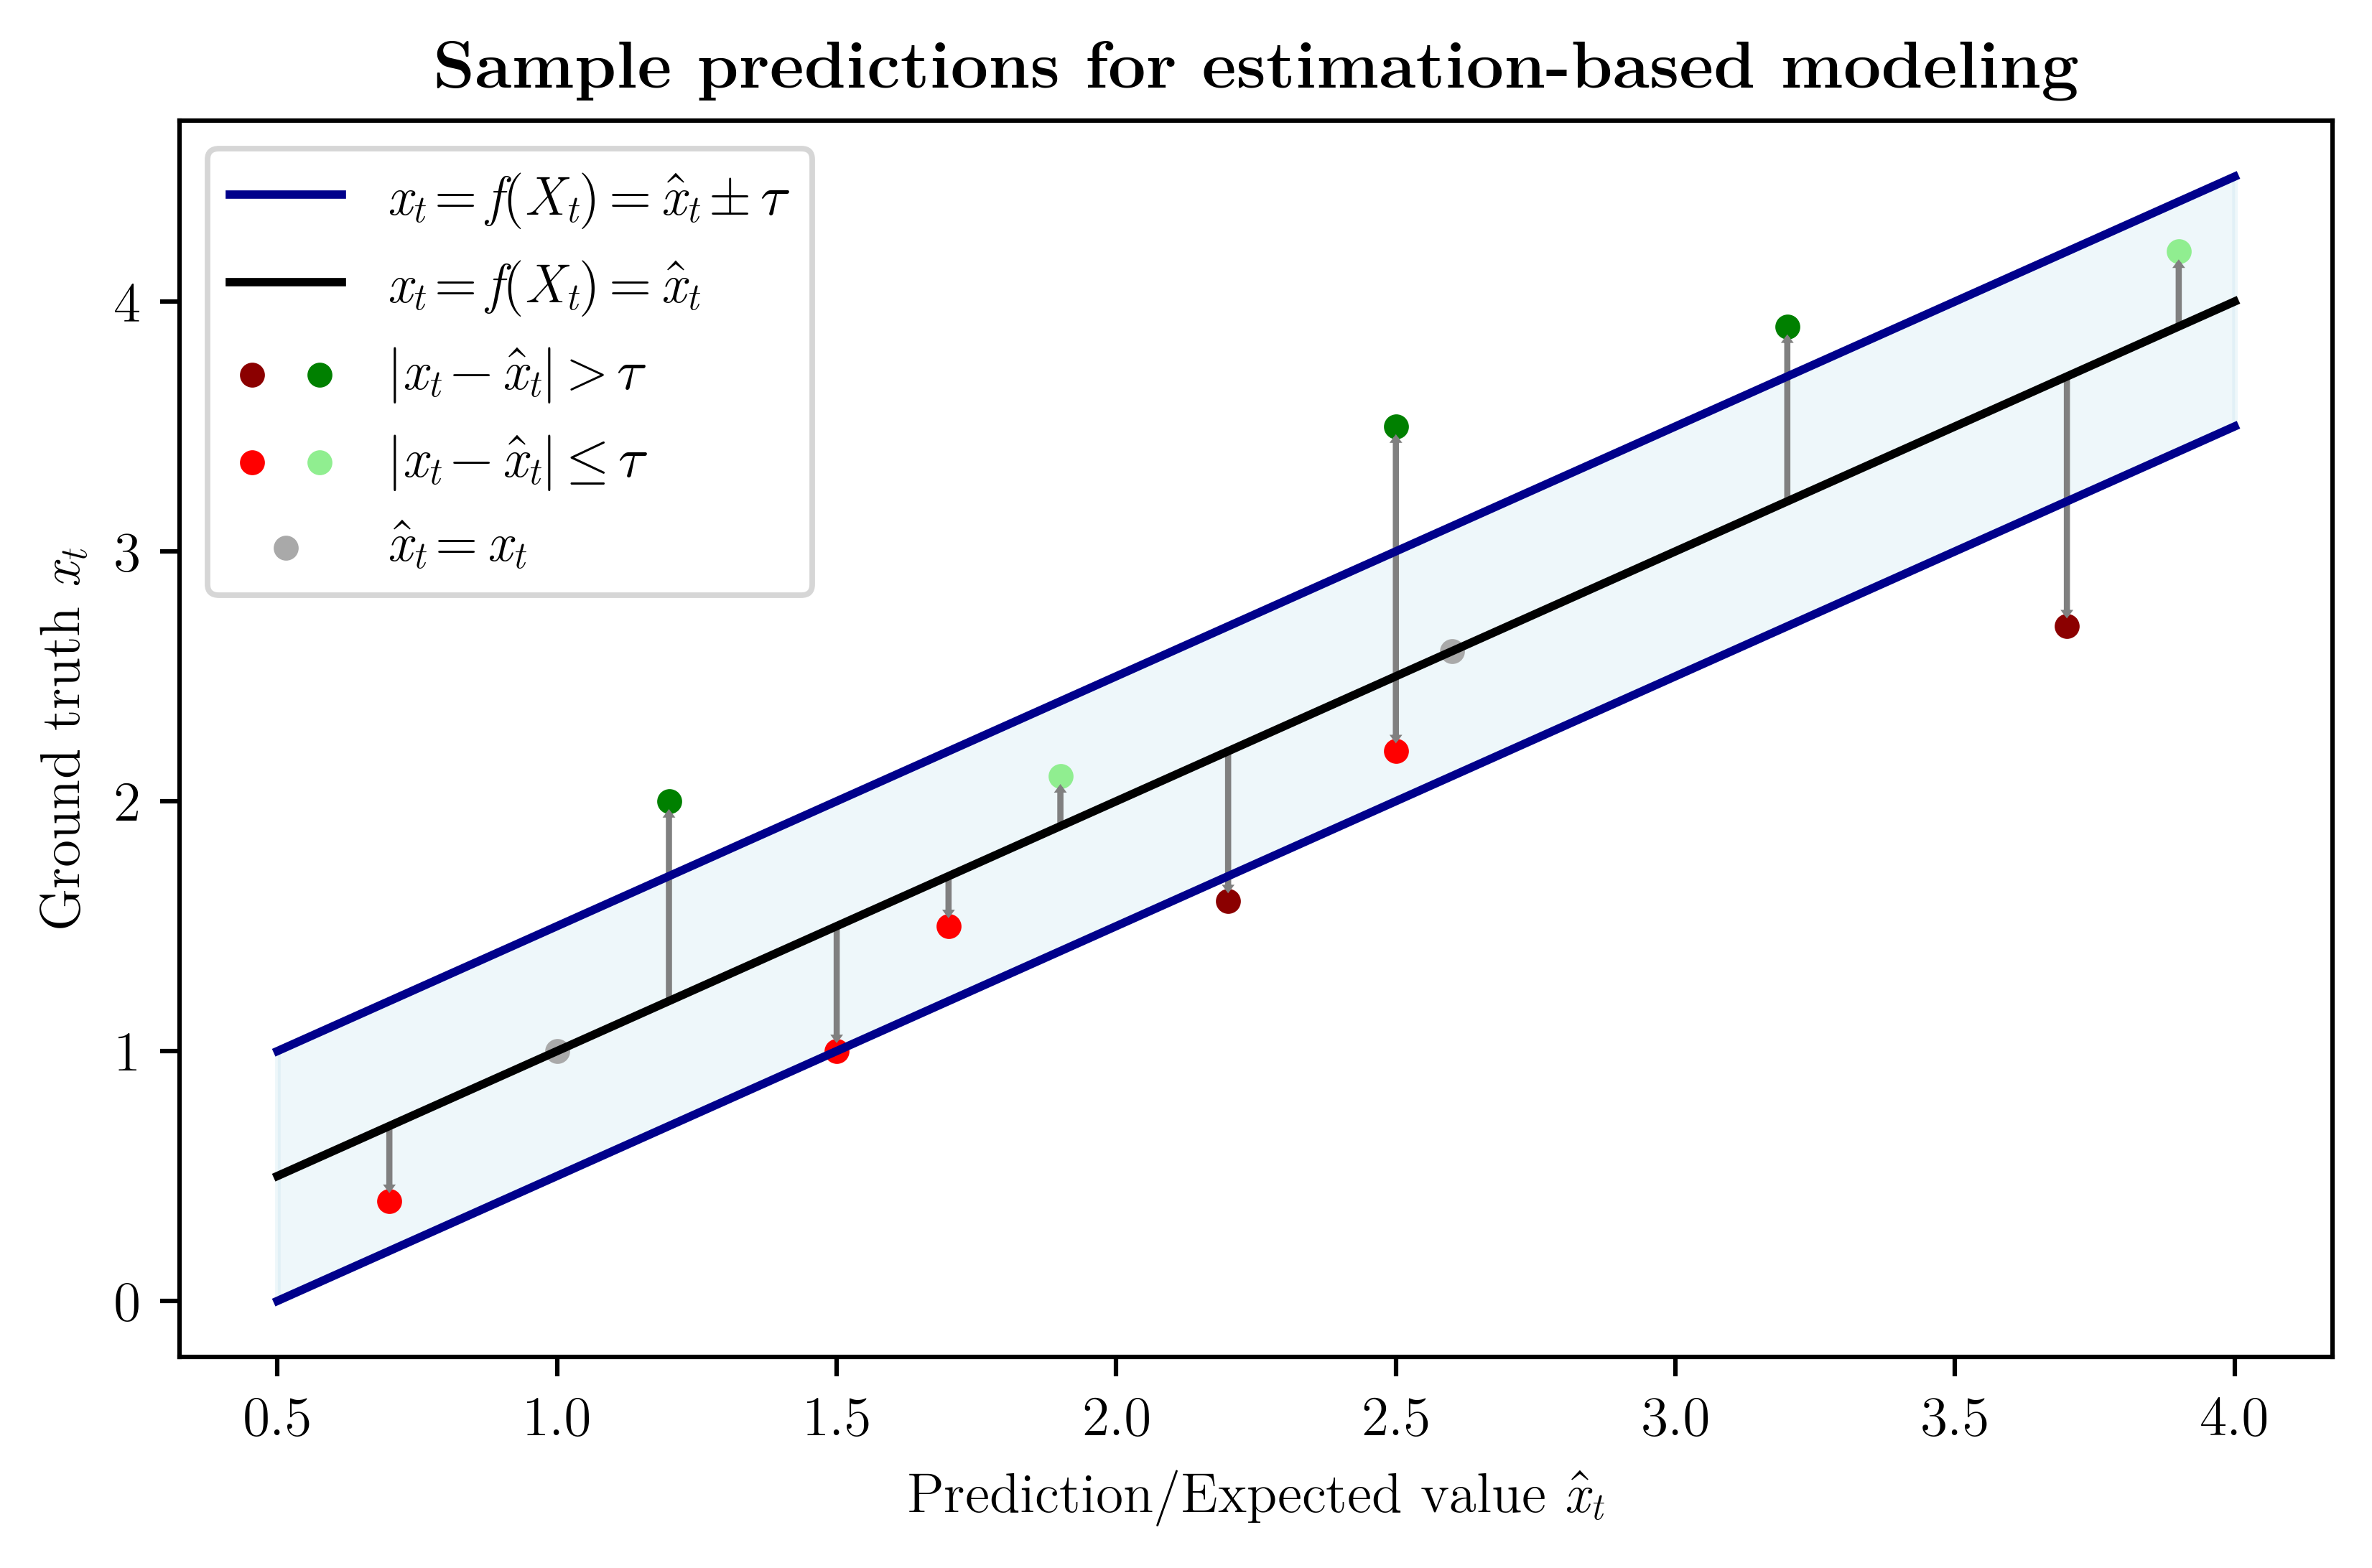

In [2]:
import numpy as np
from matplotlib.legend_handler import HandlerTuple

# x, y
x_pred =  np.array([0.7, 1.5, 1.7, 1.9, 2.2, 3.7, 2.5, 1.2, 3.2, 2.5, 2.6, 1.0, 3.9])
x_truth = np.array([0.4, 1.0, 1.5, 2.1, 1.6, 2.7, 2.2, 2.0, 3.9, 3.5, 2.6, 1.0, 4.2])

fig, ax = plt.subplots()

f_ref, = ax.plot([0.5, 4.0], [0.5, 4.0], color='black', label='$x_t = f{(X_t)} = \hat{x}_t$')
tau = 0.5
for factor in [-1, 1]:
    tau_ref, = ax.plot([0.5, 4.0], [0.5+tau*factor, 4.0+tau*factor], color='darkblue', label='$x_t = f{(X_t)} = \hat{x}_t \pm {\\tau}$' if factor == -1 else '')

ax.fill_between([0.5, 4.0], [0.5+tau, 4.0+tau], [0.5-tau, 4.0-tau], alpha=0.2, color='lightblue')

ax.set_xlabel('Prediction/Expected value $\hat{x}_t$')
ax.set_ylabel('Ground truth $x_t$')
ax.set_title('Sample predictions for estimation-based modeling', fontweight='bold')

# arrow_offset = (matplotlib.rcParams['lines.markersize'] ** 2) / 2
arrow_offset = 0.05
label_collector = [None, None, None, None, None]
for pred, exp in zip(x_pred, x_truth):
    label = ''
    if pred-exp > 0:
        if abs(pred-exp) > tau:
            color='darkred'
            label_collector[0] = ax.scatter(pred, exp, s=12, color=color)
        else:
            color='red'
            label_collector[1] = ax.scatter(pred, exp, s=12, color=color)
    elif pred-exp < 0:
        if abs(pred-exp) > tau:
            color='green'
            label_collector[2] = ax.scatter(pred, exp, s=12, color=color)
        else:
            color='lightgreen'
            label_collector[3] = ax.scatter(pred, exp, s=12, color=color)
    else:
        color='darkgray'
        label_collector[4] = ax.scatter(pred, exp, s=12, color=color)
    
    # ax.scatter(pred, exp, s=12, color=color, label=label)
    if abs(pred-exp) > 0.015:
        plt.arrow(pred, pred, 0, -(pred-exp) - (arrow_offset if -(pred-exp) > 0 else -arrow_offset), length_includes_head=True, color='gray')
    
# change ticks, in case they overlap
# ax.set_xticks(np.arange(len(df_results.index)))
# ax.set_xticklabels(df_results.index, rotation =(330), fontsize=10, ha='left')

ref_objects = [tau_ref, f_ref, (label_collector[0], label_collector[2]), (label_collector[1], label_collector[3]), label_collector[4]]
ref_labels = ['$x_t = f{(X_t)} = \hat{x}_t \pm {\\tau}$', '$x_t = f{(X_t)} = \hat{x}_t$', '$\|x_t - \hat{x}_t\| > \\tau$', '$\|x_t - \hat{x}_t\| \leq \\tau$', '$\hat{x}_t = x_t$']
ax.legend(ref_objects, ref_labels, handler_map={tuple: HandlerTuple(ndivide=None)})

# plt.legend()
fig.set_dpi(560)
plt.tight_layout()
# plt.savefig(PLOT_PATH + 'estim_model.png')
plt.show()